## Marketing Analysis of Procrastinate Pro+


In this study, we will take on the role of a marketing analyst for the entertainment app Procrastinate Pro+. Despite substantial advertising investments, the company has been experiencing losses over the past few months. Our goal is to identify the reasons behind this and help the company achieve profitability.

To do this, we have access to user data collected from May 1 to October 27, 2019, which includes:

- Server logs with data on user visits.
- Records of their purchases during this period.
- Advertising expenses.

We will analyze the following:

- User sources and devices: Identify where users come from and the devices they use.
- Customer acquisition costs: Analyze the cost of acquiring users from different advertising channels.
- Customer revenues: Calculate how much revenue each customer generates.
- Return on advertising investment: Determine when the expenses for acquiring a customer are recouped.
- Obstacles to customer acquisition: Identify and analyze factors that may hinder successful customer acquisition.

For the analysis, we have three datasets:

- File visits_info_short.csv: Contains server logs with information about website visits.
- File orders_info_short.csv: Includes information about orders.
- File costs_info_short.csv: Provides data on advertising expenses.

Structure of visits_info_short.csv:

- User Id: Unique user identifier.
- Region: User's country.
- Device: Type of user device.
- Channel: Identifier of the traffic source.
- Session Start: Date and time the session started.
- Session End: Date and time the session ended.

Structure of orders_info_short.csv:
- User Id: Unique user identifier.
- Event Dt: Date and time of the purchase.
- Revenue: Order amount.

Structure of costs_info_short.csv:
- dt: Date of the advertising campaign.
- Channel: Advertising source identifier.
- costs: Expenses for this campaign.

### Data Preprocessing

First, let's load all the necessary libraries for our work.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Let's write a function for the initial analysis of dataframes.

In [2]:
def primary_analysis(df):
    print("Information about the dataframe:")
    print(df.info())
    
    print("\nFirst 5 rows of the dataframe:")
    print(df.head())
    
    print("\nDescription of numerical columns:")
    print(df.describe())
    
    print("\nNumber of duplicate rows in the dataset:")
    print(df.duplicated().sum())
    
    print("\nFrequency distribution for categorical columns:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nColumn '{column}':")
        print(df[column].value_counts())

Load the data on visits, orders, and advertising expenses from CSV files into variables:

In [3]:
try:
    visits, orders, ad_costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),  # Session log
        pd.read_csv('/datasets/orders_info_short.csv'),  # Orders
        pd.read_csv('/datasets/costs_info_short.csv'),  # Expenses
    )
except:
    visits, orders, ad_costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # Session log
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # Orders
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # Expenses
    )

events = None

Let's examine the data using the head() and info() functions.

In [4]:
primary_analysis(visits)

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

First 5 rows of the dataframe:
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  20

The last two columns, "Session Start" and "Session End," raise some concerns as they contain date and time but are formatted as objects. There are no missing values. Explicit and implicit duplicates are also absent. It would also be better to change the case of the column names. For now, let's focus on the other datasets.

In [5]:
primary_analysis(orders)

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

First 5 rows of the dataframe:
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Description of numerical columns:
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.43332

We also observe that the format in "Event Dt" is incorrect. There are no missing values or duplicates. Let's move on.

In [6]:
primary_analysis(ad_costs)

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

First 5 rows of the dataframe:
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Description of numerical columns:
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

Number of duplicate rows in the dataset:
0

Frequency distribution for categorical columns:

Column 'dt':
dt
2019-05-01    10
2019-05-02    10
2019-05-03    10
2019-05-04    10
2019-05-05 

Let's standardize the column names and change the format of columns that contain dates and times.

In [7]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
ad_costs.columns = [x.lower().replace(' ', '_') for x in ad_costs.columns]

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date 

In [9]:
visits.info()
orders.info()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Data preprocessing is complete. During the check, no explicit or implicit duplicates, as well as missing values, were found. The data types of all columns have been aligned with their content. At this stage, the data is fully prepared for further analysis. We can proceed to the next step.

### Functions for calculating and analyzing LTV, ROI, retention, and conversion.

We will create functions for generating profiles, calculating retention, conversion, LTV, and ROI, as well as functions for visualizing these metrics.

Metrics:

- get_profiles() — for creating user profiles,
- get_retention() — for calculating Retention Rate,
- get_conversion() — for calculating conversion,
- get_ltv() — for calculating LTV.

Graphs:

- filter_data() — for smoothing the data,
- plot_retention() — for plotting the Retention Rate graph,
- plot_conversion() — for plotting the conversion graph,
- plot_ltv_roi() — for visualizing LTV and ROI.

In [10]:
# Function for creating user profiles

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # Find parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # For cohort analysis, define the date of the first visit
    # and the first day of the month in which the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # Add the "payer" flag for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Add flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # Calculate the number of unique users
    # with the same source and acquisition date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Merge ad costs and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Divide advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Add acquisition cost to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # Set acquisition cost for organic users to zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
# Function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Add the "payer" column to the provided dimensions list
    dimensions = ['payer'] + dimensions

    # Exclude users who didn't "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Collect raw data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [12]:
# Function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Exclude users who didn't "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Group by cohort if dimensions is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # Function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Divide each "cell" in the row by the cohort size to get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # For the conversion dynamics table, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # Get the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [13]:
# Function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Exclude users who didn't "survive" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Add purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    # Calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Group by cohort if dimensions is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Function for grouping by desired features
    def group_by_dimensions(df, dims, horizon_days):
        # Create a "triangle" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Find cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        # Calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # Merge cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Calculate LTV: divide each "cell" by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # Exclude lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # Create a dataframe with user data and CAC values, adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculate average CAC by dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Remove rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # Add CAC to the ROI table
        roi['cac'] = cac['cac']

        # In the final table, keep cohort sizes, CAC, and ROI for lifetimes within the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Return LTV and ROI tables
        return result, roi

    # Get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # For the dynamics tables, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # Get dynamics tables for LTV and ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # Raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

In [14]:
# Function for smoothing the dataframe

def filter_data(df, window):
    # Apply moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# Function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # Set grid size for plots
    plt.figure(figsize=(15, 10))

    # Exclude cohort size and day 1 retention
    retention = retention.drop(columns=['cohort_size', 0])
    # In retention history, keep only the desired lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[ 
        [horizon - 1]
    ]

    # If the retention table has only payer in the index, add cohort as a second criterion
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # Create a 2x2 grid of subplots
    # In the first subplot, plot retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Paying Users')

    # In the second subplot, plot retention curves for non-paying users
    # The vertical axis is shared with the first plot
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of Non-Paying Users')

    # In the third subplot, plot the dynamics of retention for paying users
    ax3 = plt.subplot(2, 2, 3)
    # Get column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filter data and plot
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(
        f'Retention Dynamics of Paying Users on Day {horizon}'
    )

    # In the fourth subplot, plot the dynamics of retention for non-paying users
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filter data and plot
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(
        f'Retention Dynamics of Non-Paying Users on Day {horizon}'
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# Function for visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # Set grid size for plots
    plt.figure(figsize=(15, 5))

    # Exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # In conversion history, keep only the desired lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First plot — conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User Conversion')

    # Second plot — conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # Pivot table columns will be all index columns except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'User Conversion Dynamics on Day {horizon}')

    plt.tight_layout()
    plt.show()

In [17]:
# Function for visualizing LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # Set grid for plotting graphs
    plt.figure(figsize=(20, 10))

    # Exclude cohort sizes from LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # In LTV dynamics table, keep only the desired lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Store customer acquisition cost in a separate frame
    cac_history = roi_history[['cac']]

    # Exclude cohort sizes and CAC from ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # In ROI dynamics table, keep only the desired lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # First plot — LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # Second plot — LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # Pivot table columns will be all index columns except the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'LTV Dynamics on Day {horizon}')

    # Third plot — CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # Pivot table columns will be all index columns except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('Customer Acquisition Cost Dynamics')

    # Fourth plot — ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even point')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # Fifth plot — ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # Pivot table columns will be all index columns except the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even point')
    plt.xlabel('Acquisition Date')
    plt.title(f'ROI Dynamics on Day {horizon}')

    plt.tight_layout()
    plt.show()

All the functions are prepared for use. We can move on to the exploratory data analysis.

### Exploratory Data Analysis

Let's begin the exploratory data analysis. To start, we'll create user profiles. For this, we will call the get_profiles() function, passing it data on visits, purchases, and advertising expenses.

In [18]:
profiles = get_profiles(visits, orders, events, ad_costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


We will define the minimum and maximum user acquisition dates or the available user acquisition interval.

In [19]:
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [20]:
observation_date =  profiles['dt'].max() 
observation_date

datetime.date(2019, 10, 27)

The user acquisition interval corresponds to the specified time period – from May 1 to October 27, 2019.

Let's determine from which countries users come to the app and which country has the highest number of paying users. To do this, we'll create a table that reflects the number of users and the proportion of paying users from each country.

First, let's write a function for aggregation that we'll use for countries, and later for devices and channels.

In [21]:
def aggregate_and_format_generic(df, group_by, agg_funcs):

    agg_df = df.groupby(group_by).agg(agg_funcs).reset_index()
    
    agg_df['total_users'] = agg_df['user_id']
    agg_df['paying_share'] = (agg_df['payer'] / agg_df['total_users']) * 100
    
    agg_df = agg_df.sort_values(by='paying_share', ascending=False)
    
    return agg_df.style.format({
        'non_payers': '{:,.0f}',
        'payers': '{:,.0f}',
        'total_users': '{:,.0f}',
        'paying_share': '{:.2f}%'
    })

In [22]:
region_payers = aggregate_and_format_generic(
    profiles,
    group_by='region',
    agg_funcs={
        'payer': 'sum',
        'user_id': 'nunique'
    }
)
region_payers

,region,payer,user_id,total_users,paying_share
3,United States,6902,100002,"100,002",6.90%
1,Germany,616,14981,"14,981",4.11%
2,UK,700,17575,"17,575",3.98%
0,France,663,17450,"17,450",3.80%


Here are the following conclusions:

- The highest proportion of paying users is observed in the United States (6.90%), significantly higher than in other regions.
- The lowest proportion of paying users is found in France (3.80%), despite a relatively large total number of users.
- Germany and the United Kingdom have similar proportions of paying users, approximately 4.11% and 3.98%, respectively.

Let's find out which devices are used by customers and which devices are preferred by paying users. We'll create a table reflecting the number of users and the proportion of paying users for each device.

In [23]:
region_payers = aggregate_and_format_generic(
    profiles,
    group_by='device',
    agg_funcs={
        'payer': 'sum',
        'user_id': 'nunique'
    }
)
region_payers

,device,payer,user_id,total_users,paying_share
1,Mac,1912,30042,"30,042",6.36%
3,iPhone,3382,54479,"54,479",6.21%
0,Android,2050,35032,"35,032",5.85%
2,PC,1537,30455,"30,455",5.05%


Here are the conclusions that can be made:

- The highest proportion of paying users is observed among Mac users (6.36%), slightly higher than among iPhone users (6.21%).
- The lowest proportion of paying users is noted among PC users (5.05%), despite the relatively large total number of users.
- Android devices have a paying user share of 5.85%, which is higher than PC but lower than Apple devices (Mac and iPhone)

Let's study the advertising sources and determine which channels brought the most paying users. We'll create a table reflecting the number of users and the share of paying users for each acquisition channel.

In [24]:
region_payers = aggregate_and_format_generic(
    profiles,
    group_by='channel',
    agg_funcs={
        'payer': 'sum',
        'user_id': 'nunique'
    }
)
region_payers

,channel,payer,user_id,total_users,paying_share
1,FaceBoom,3557,29144,"29,144",12.20%
0,AdNonSense,440,3880,"3,880",11.34%
9,lambdaMediaAds,225,2149,"2,149",10.47%
6,TipTop,1878,19561,"19,561",9.60%
5,RocketSuperAds,352,4448,"4,448",7.91%
7,WahooNetBanner,453,8553,"8,553",5.30%
8,YRabbit,165,4312,"4,312",3.83%
3,MediaTornado,156,4364,"4,364",3.57%
2,LeapBob,262,8553,"8,553",3.06%
4,OppleCreativeMedia,233,8605,"8,605",2.71%


Here are the key takeaways:

- FaceBoom shows the highest share of paying users (12.20%), indicating the high effectiveness of this channel.
- AdNonSense and lambdaMediaAds also have high shares of paying users, 11.34% and 10.47%, respectively.
- The organic channel shows the lowest share of paying users (2.06%), despite having the largest total number of users (56,439).
- The OppleCreativeMedia and LeapBob channels also have low shares of paying users, 2.71% and 3.06%, respectively.

The analysis shows that the campaign's effectiveness varies significantly depending on the region, device, and advertising channel. The highest shares of paying users are observed in the United States, among Apple device users, and users acquired through the FaceBoom channel.

### Marketing

Let's calculate the total marketing expenses.

In [25]:
total = ad_costs['costs'].sum()
total

np.float64(105497.30000000002)

Let's find out how the expenses are distributed across the advertising sources, i.e., how much money was spent on each source.

In [26]:
ad_costs_channel = (
    ad_costs.groupby('channel')
    .agg({'costs': 'sum'})
)
ad_costs_channel['costs_share'] = (ad_costs_channel['costs']/total)*100
ad_costs_channel.sort_values(by='costs_share',ascending=False)

,costs,costs_share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


The following conclusions can be made:

- The majority of the advertising budget (over 80%) is concentrated on two channels: TipTop and FaceBoom.
- The remaining channels take up significantly smaller portions of the budget, each less than 5%.

Let's create a chart to visualize the weekly changes in expenses over time by each source. Then, on another chart, we'll visualize the monthly changes in expenses over time by each source.

In [27]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month
ad_costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


In [28]:
ad_costs_weekly = (
    ad_costs.groupby(['week', 'channel'])
    .agg({'costs': 'sum'})
    .reset_index()
)
ad_costs_weekly

,week,channel,costs
0,18,AdNonSense,211.05
1,18,FaceBoom,535.70
2,18,LeapBob,16.80
3,18,MediaTornado,38.64
4,18,OppleCreativeMedia,24.00
...,...,...,...
255,43,RocketSuperAds,50.70
256,43,TipTop,3265.50
257,43,WahooNetBanner,253.20
258,43,YRabbit,48.33


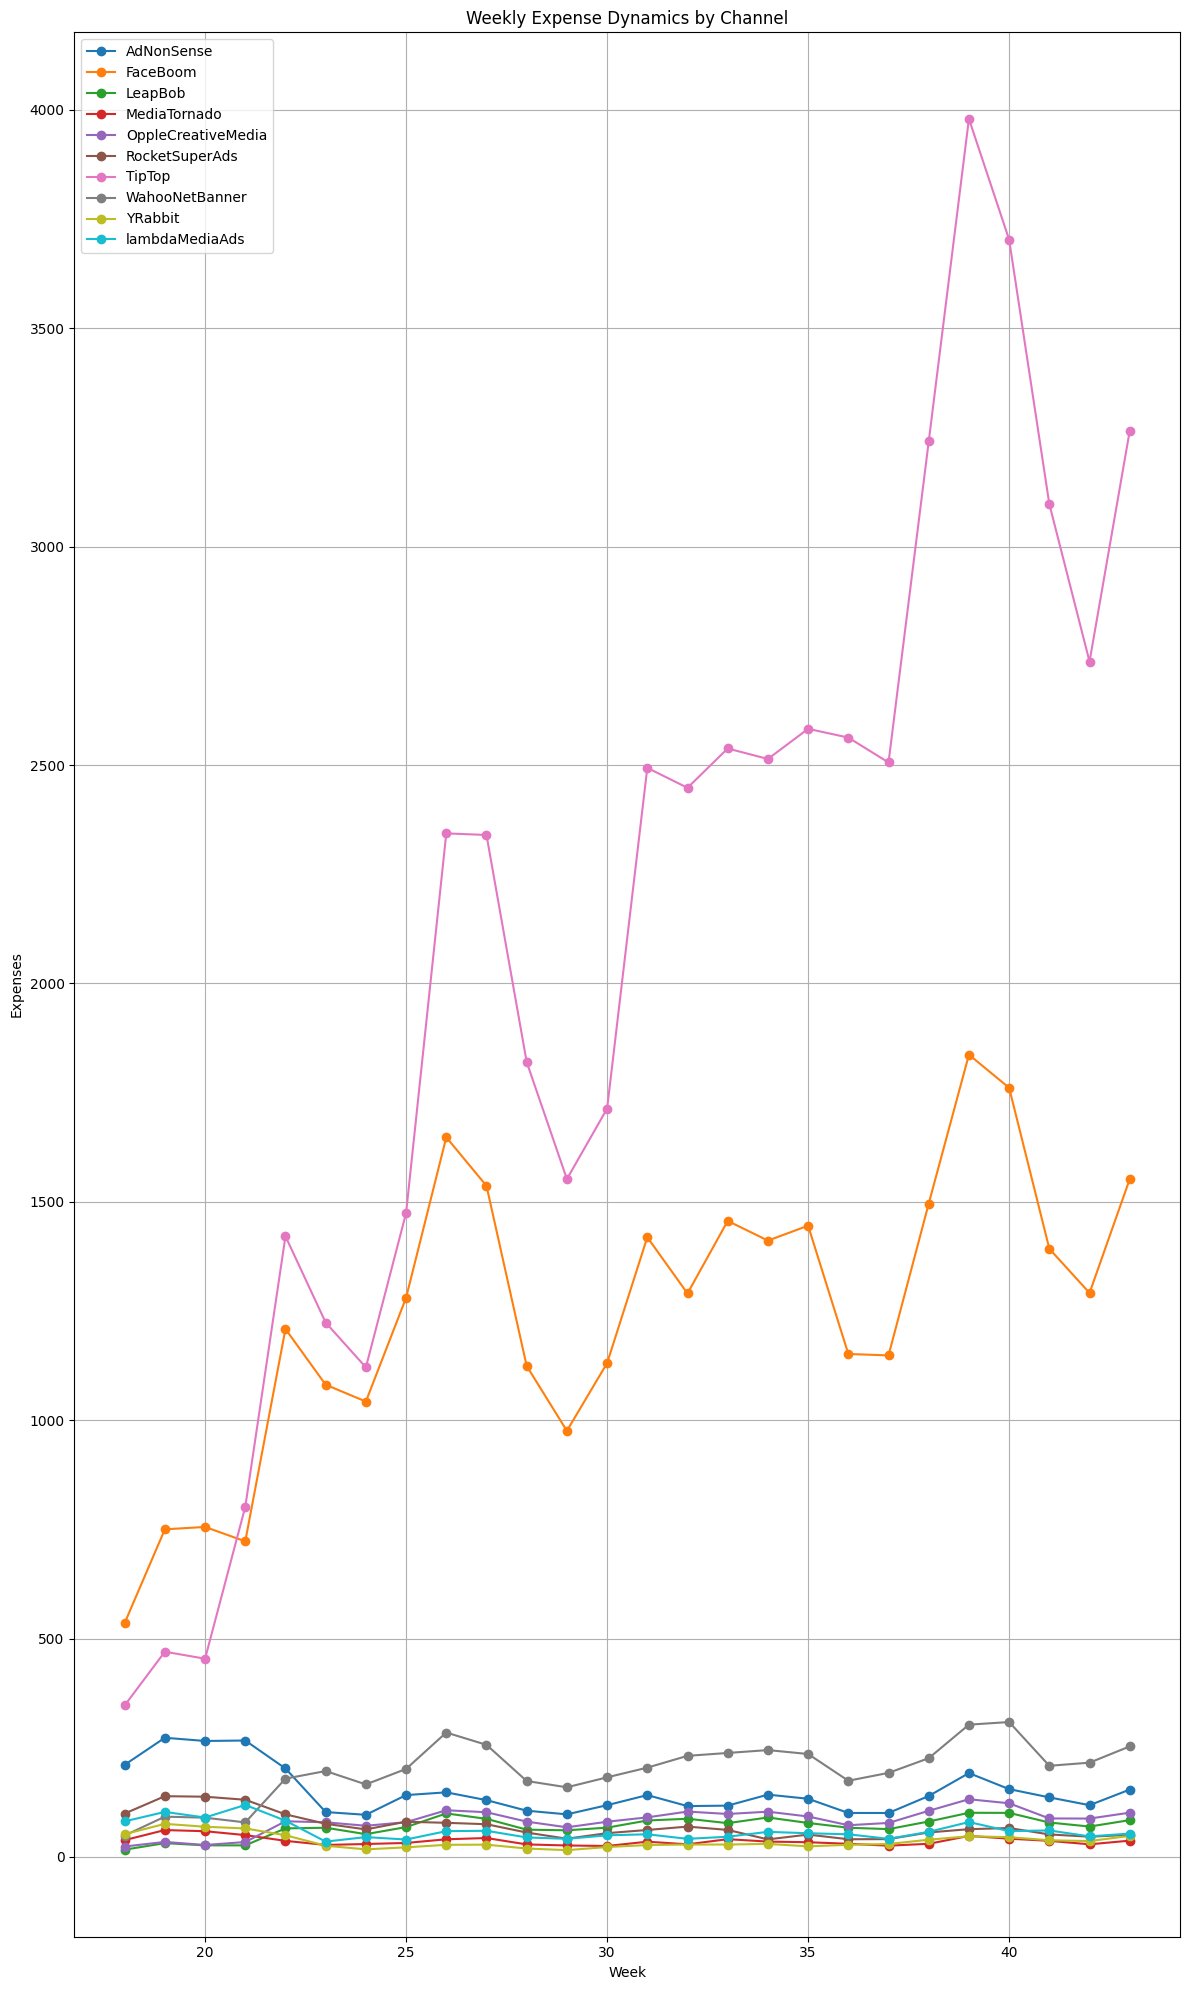

In [29]:
plt.figure(figsize=(12, 20))
for channel in ad_costs_weekly['channel'].unique():
    channel_data = ad_costs_weekly[ad_costs_weekly['channel'] == channel]
    plt.plot(channel_data['week'], channel_data['costs'], marker='o', linestyle='-', label=channel)
plt.xlabel('Week')
plt.ylabel('Expenses')
plt.title('Weekly Expense Dynamics by Channel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

On the graph, we can see confirmation of our hypotheses that the majority of the budget is allocated to two channels: TipTop and FaceBoom. There is a consistent increase in expenses for these channels, with the exception of a decrease between weeks 27 and 30. From weeks 32 to 37, the expenses remain stable, followed by a sharp spike in weeks 37-39 for both channels. For the remaining channels, the expenses stay consistently low.

In [30]:
ad_costs_monthly = (
    ad_costs.groupby(['month', 'channel'])
    .agg({'costs': 'sum'})
    .reset_index()
)
ad_costs_monthly

,month,channel,costs
0,5,AdNonSense,1169.700
1,5,FaceBoom,3524.400
2,5,LeapBob,140.280
3,5,MediaTornado,238.560
4,5,OppleCreativeMedia,169.750
5,5,RocketSuperAds,577.980
6,5,TipTop,2981.000
7,5,WahooNetBanner,418.800
8,5,YRabbit,299.700
9,5,lambdaMediaAds,458.400


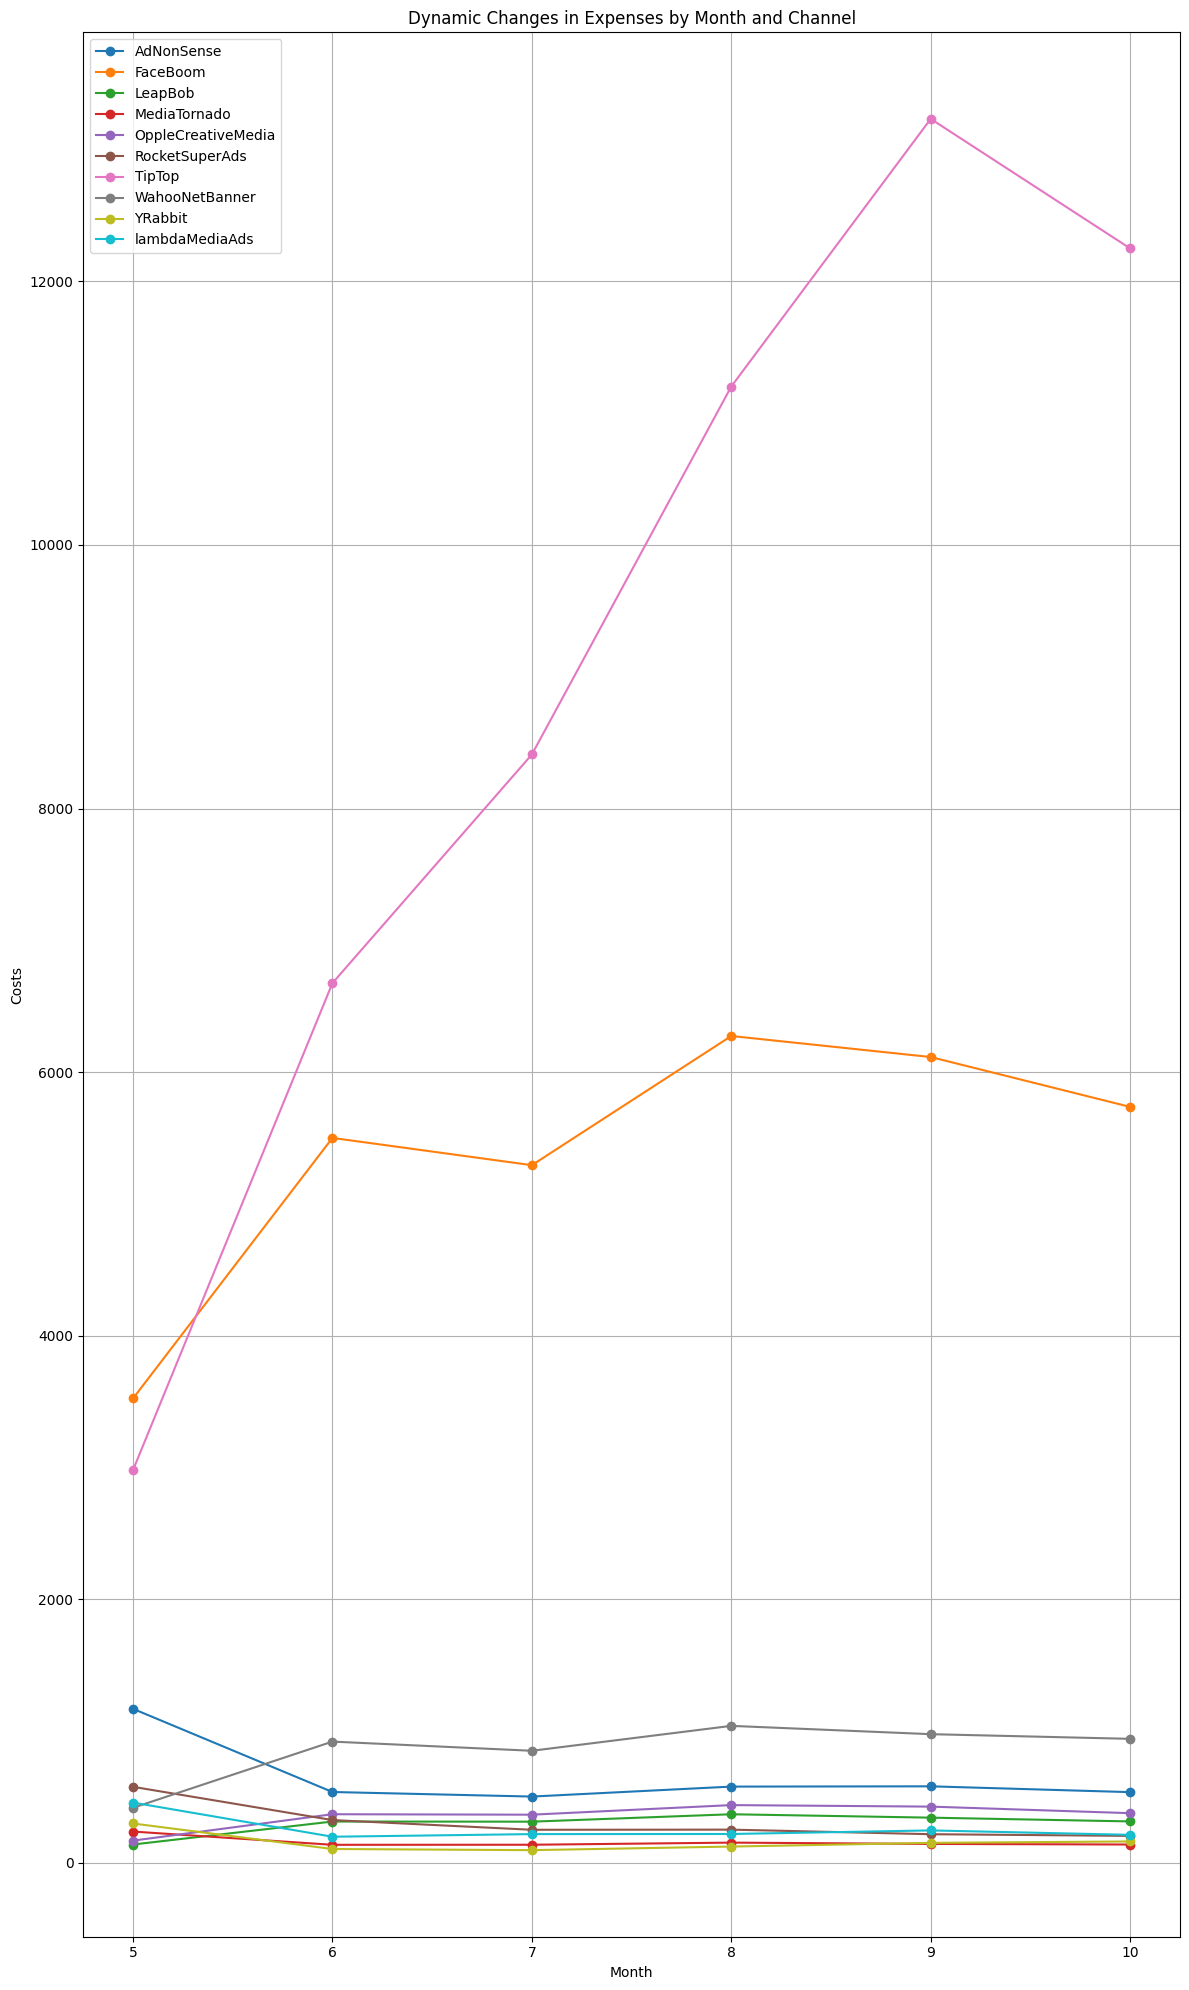

In [31]:
plt.figure(figsize=(12, 20))
for channel in ad_costs_monthly['channel'].unique():
    channel_data = ad_costs_monthly[ad_costs_monthly['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['costs'], marker='o', linestyle='-', label=channel)
plt.xlabel('Month')
plt.ylabel('Costs')
plt.title('Dynamic Changes in Expenses by Month and Channel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

FaceBoom and TipTop are the largest and most consistently used advertising channels. They have the highest expenses in most months. Channels such as AdNonSense and MediaTornado show more stable expenses across different months.

Next, we will determine the average cost of acquiring one user (CAC) from each source. To do this, we will use user profiles and create graphs.

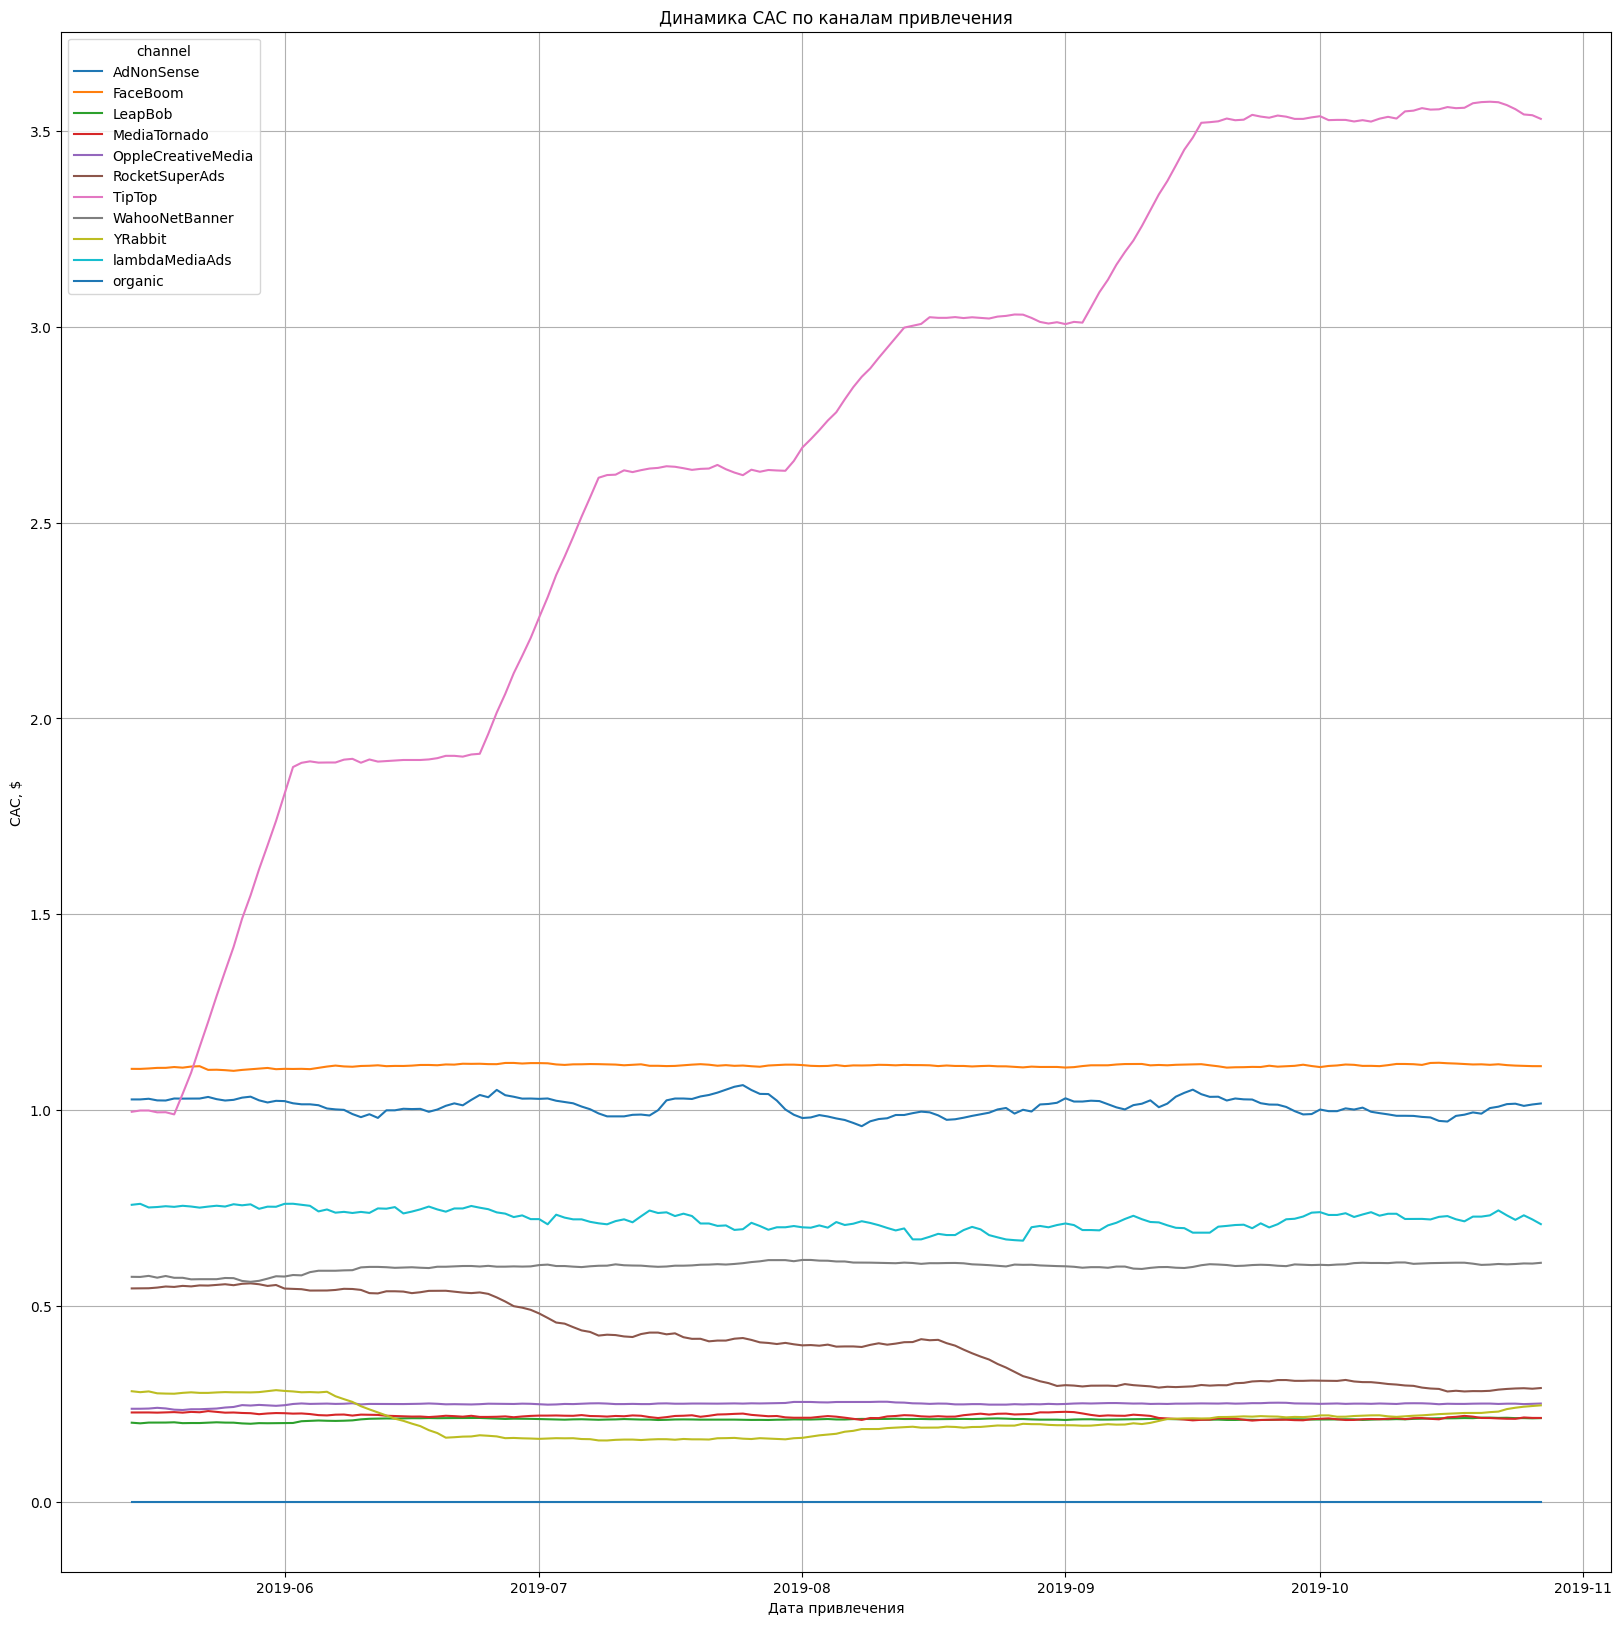

In [32]:
report = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
)
window = 14
filter_data(report, window).plot(grid=True, figsize=(20, 20))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

At first glance, the graph highlights a significant change in the cost of acquiring a single user (CAC) for the TipTop channel over different time periods: from 1 to 2 in June, from 2 to 2.6 in July, from 2.6 to 3 in August, and from 3 to 3.5 in September. Meanwhile, FaceBoom and AdNonSense channels show more stable values around 1 per user. All other channels fall within the range of 0 to 1, with the largest cluster around 25 cents per customer, with four promotion channels occupying this position.

The data analysis indicates that the majority of the company's advertising budget (over 80%) is allocated to two key channels: TipTop and FaceBoom. These channels show a constant increase in spending, with some fluctuations at different times.

FaceBoom and TipTop stand out among other channels as the largest and most stable for advertising placement. The cost of acquiring a user on TipTop fluctuates significantly over time, ranging from 1 to 3.5 per customer in different months. Meanwhile, the cost of acquiring a user through FaceBoom and AdNonSense remains more stable, around 1 per customer.

Other channels are allocated smaller budgets, predominantly in the range of 0 to 1 per user, with the largest concentration of channels around 25 cents per customer. 

### Advertising profitability

Using the LTV, ROI, and CAC graphs, we will analyze the profitability of advertising and try to identify anomalies.

To begin, let's establish the moment and analysis horizon. We assume the date is November 1, 2019, and the business plan specifies that users should break even no later than two weeks after acquisition. We will exclude organic traffic.

In [33]:
observation_date = datetime(2019, 11, 1).date()  # Moment of analysis
horizon_days = 14  # Horizon of analysis

In [34]:
filtered_profiles = profiles.query('channel != "organic"')

To begin, let's assess the overall situation by looking at the return on investment (ROI) of advertising. We will calculate and visualize the Lifetime Value (LTV) and ROI by calling the get_ltv() and plot_ltv_roi() functions.

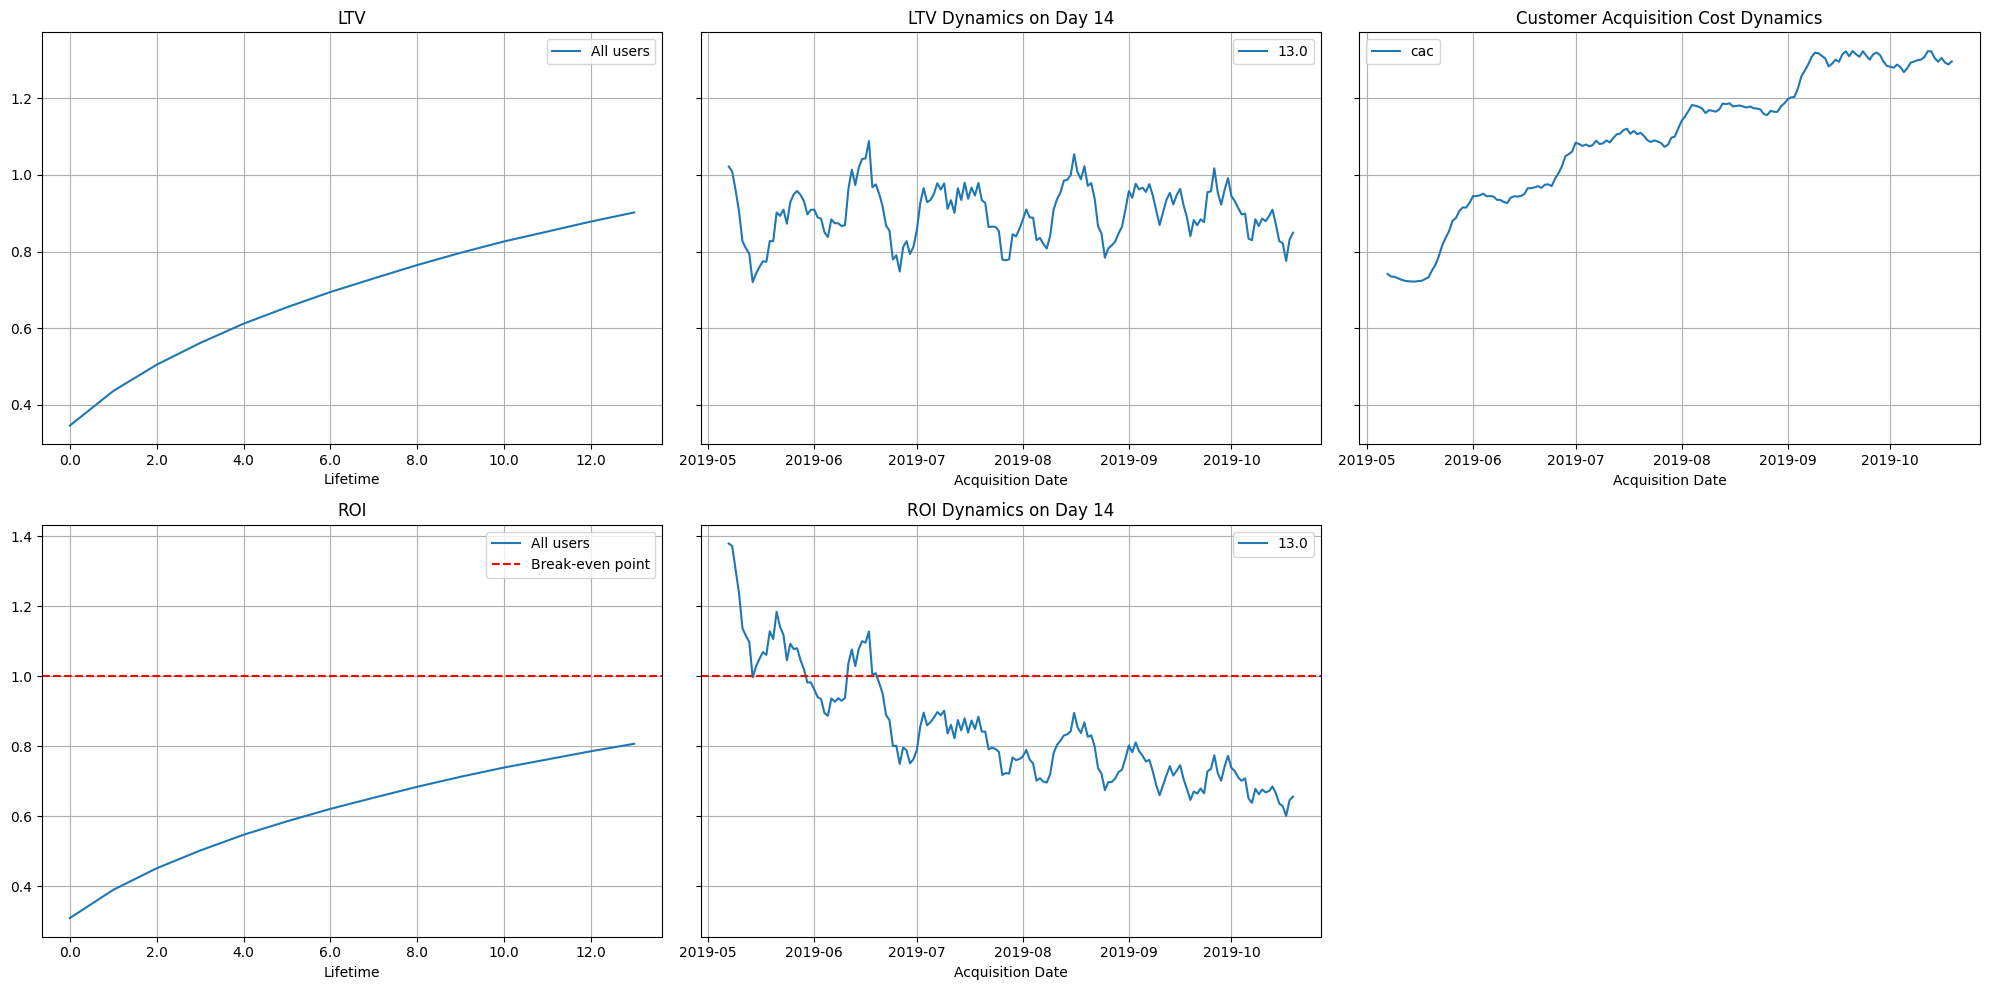

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Based on the graphs, the following conclusions can be made:

- It is evident that LTV increases over time, which means that customers bring in more revenue as they continue to interact with the app. LTV dynamics are not stable, but overall, the trend shows steady growth with some periods of decline.
- CAC is not stable – we can observe a continuous increase, which might indicate a constant rise in marketing costs. There is a spike in the second half of May and a steady growth starting from early June.
- ROI increases over time, meaning that the return on investment grows as interaction with customers continues. However, it does not reach the break-even point, indicating that marketing costs have not yet been recovered. It is also noticeable that ROI in the early part of the period (before the end of May) exceeds the break-even level, but from early June onwards, it decreases and falls below the break-even point, which could be a cause for concern.

The key points to note are:

- The cost of acquiring a customer significantly increases – with a spike from mid-May to the end of May and a steady rise from early June to the end of the period, with local minor decreases.
- Break-even has not been achieved.

Calculate and visualize the overall conversion by calling the get_conversion() and plot_conversion() function

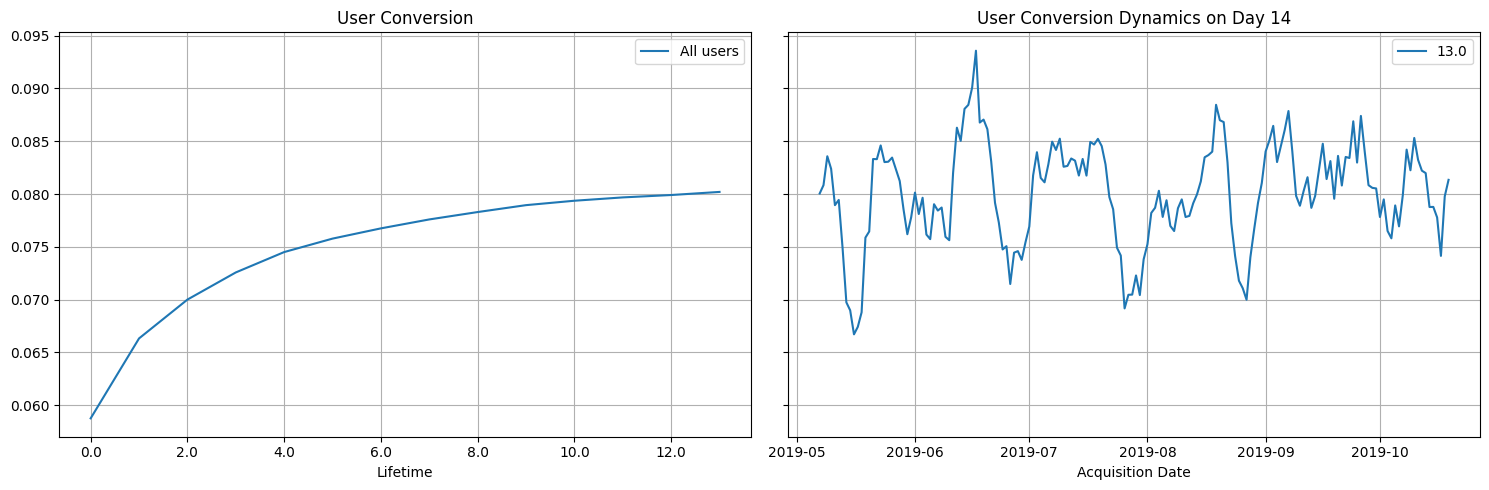

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

It can be seen that the user conversion rate increases over time, reaching around 8%. This means that more users are making purchases as they continue interacting with the product. Despite strong fluctuations in the dynamics, the conversion rate remains within the range of 6.5% to 9.5%.

Let's calculate and visualize the conversion by regions by calling the get_conversion() and plot_conversion() functions.

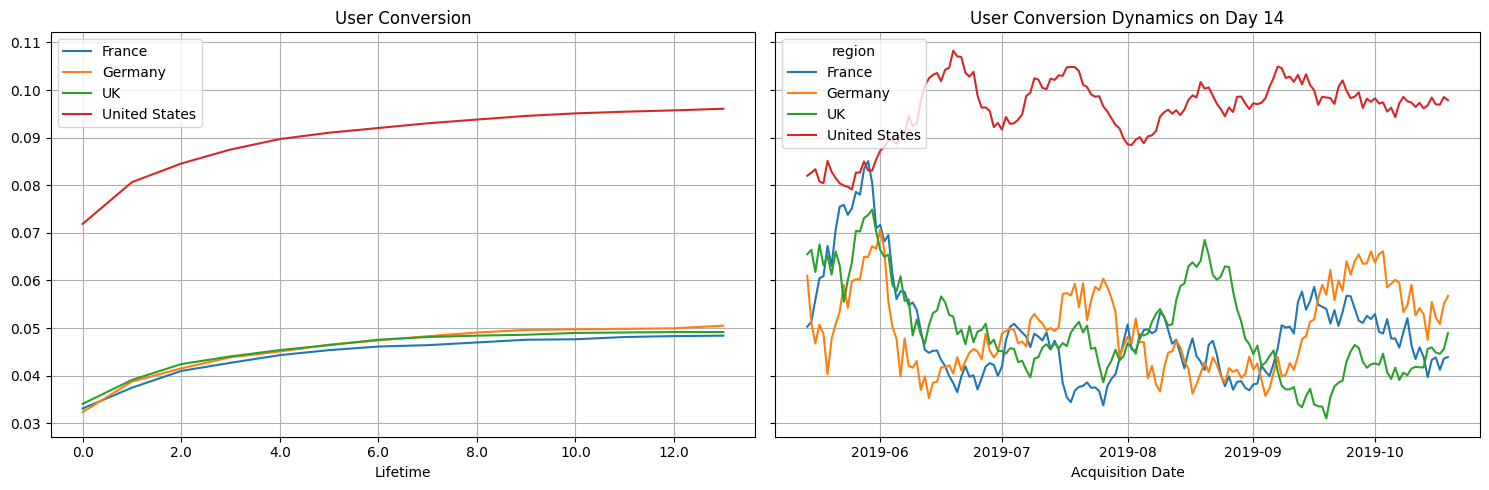

In [37]:
dimensions = ['region']
window = 14

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window)

It is evident that the user conversion is increasing across all regions. However, it can be noticed that the conversion rate for users from the United States is much higher, reaching 10%. All other regions fall within the range of 3% to 5%.

Let's calculate and visualize the conversion by devices by calling the functions get_conversion() and plot_conversion().

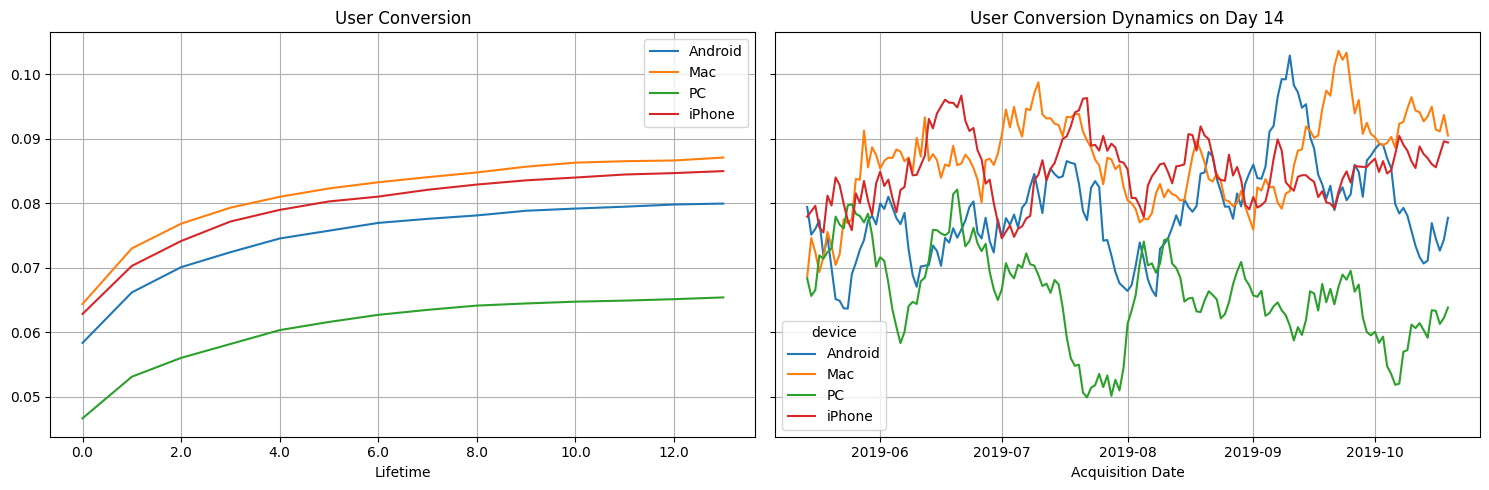

In [38]:
dimensions = ['device']
window = 14

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window)

It is evident that the user conversion rate is increasing across all devices. However, it is noticeable that the conversion rate for Mac and iPhone users is much higher, reaching around 9%. Android users are not far behind with 8%. The lowest conversion rate is observed among PC users.

Let's calculate and visualize the conversion by channels by calling the get_conversion() and plot_conversion() functions.

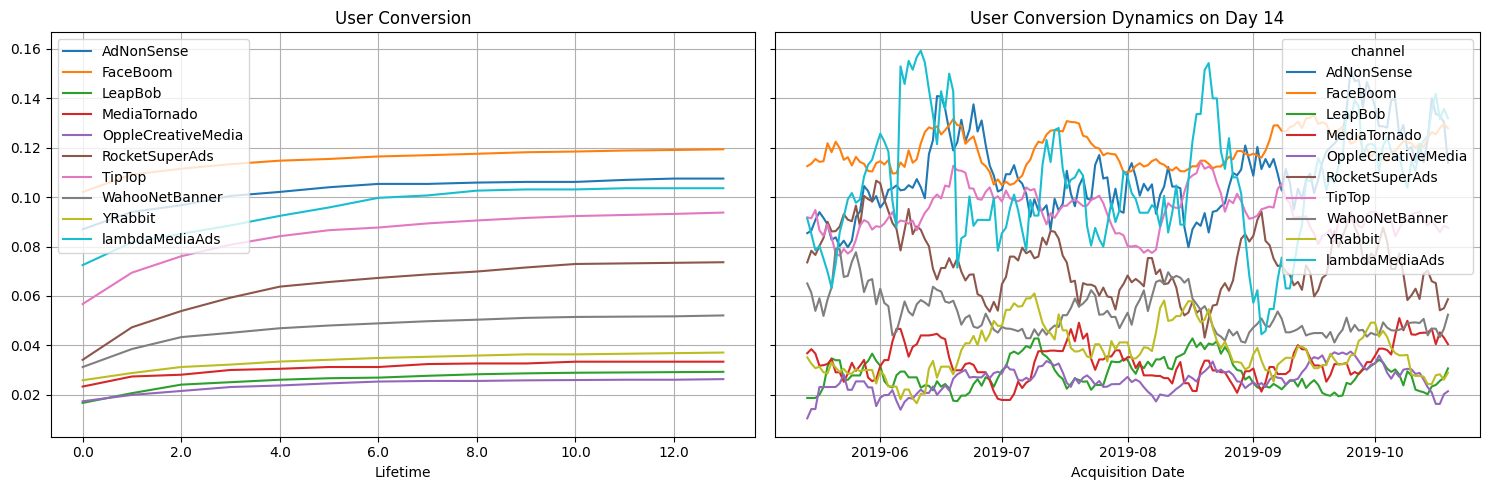

In [39]:
dimensions = ['channel']
window = 14

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days,window)

Based on the graphs, the following conclusions can be made:

- AdNonSense and FaceBoom demonstrate the highest conversion rates, reaching approximately 0.12-0.15 by the end of the observed period.
- LeapBob and RocketSuperAds also show good results, though their conversion rates are slightly lower, around 0.10-0.12.
- MediaTornado and TipTop are in the middle range, with conversion rates around 0.08-0.10.
- OppleCreativeMedia, WahooNetBanner, YRabbit, and IambdaMediaAds have lower performance, with conversion rates ranging from 0.02 to 0.06.

We will calculate and visualize the overall retention by calling the functions get_retention() and plot_retention().

In [40]:
filtered_visits = visits.query('channel != "organic"')

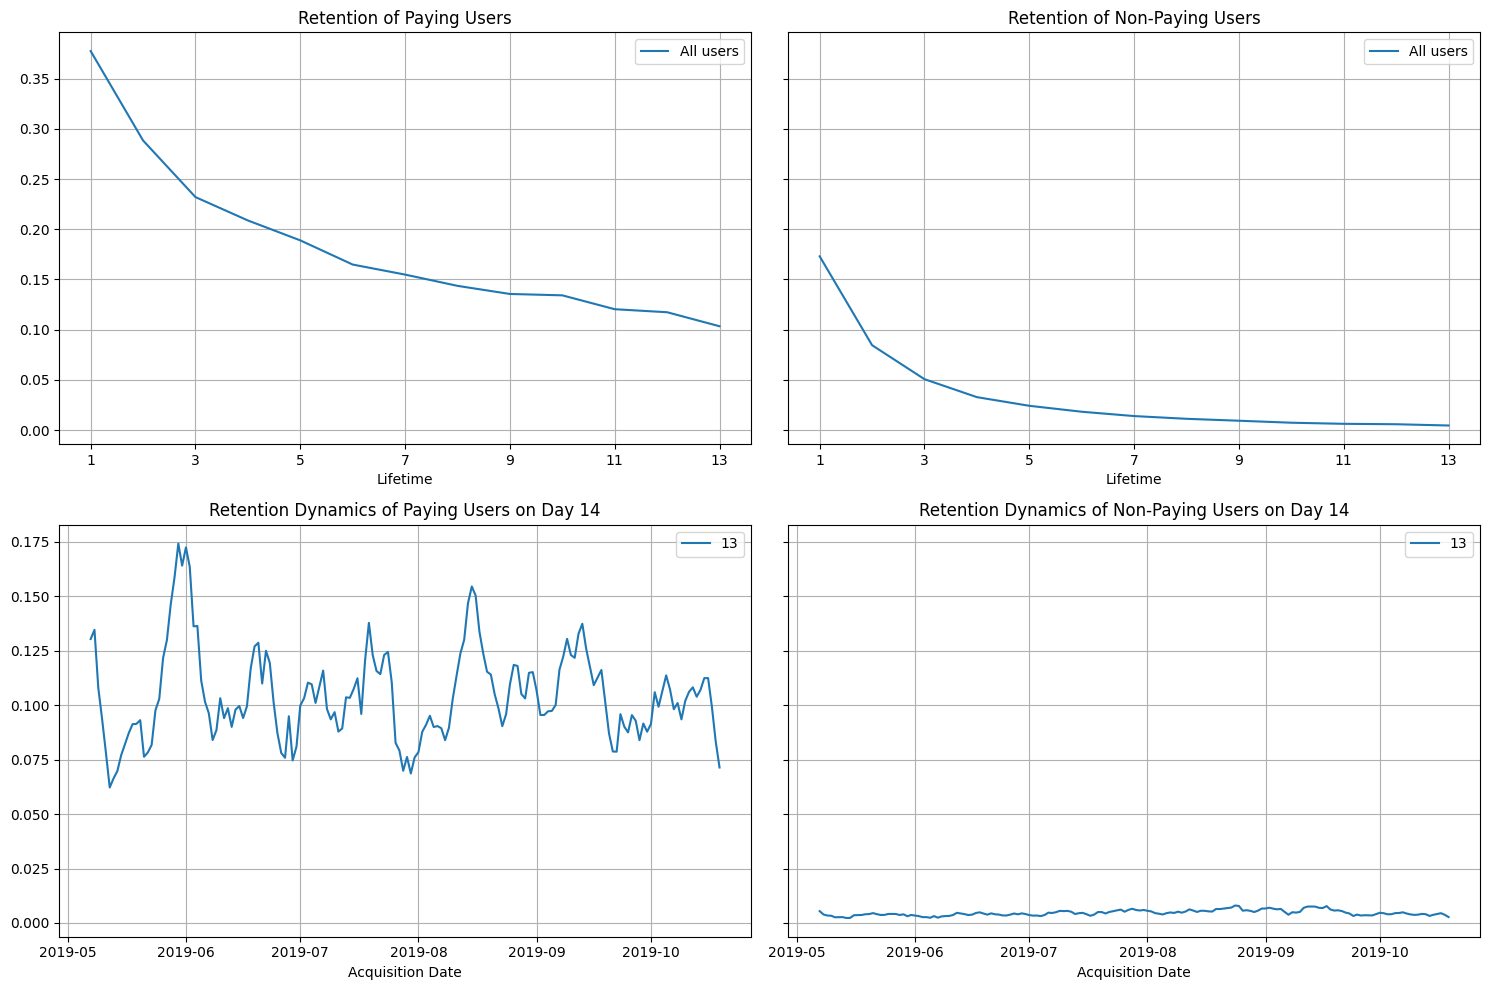

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, filtered_visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

From the graphs, the following conclusions can be made:

- It is evident that the retention of paying users decreases over time, starting at around 0.35 and dropping below 0.10 by the 12th day. This significant decline indicates the need to analyze the reasons and search for strategies to improve retention for this category of users.
- The retention of non-paying users also decreases over time, starting at around 0.07 and reaching nearly zero by the 12th day. This may suggest weak interest or dissatisfaction among non-paying users

We will calculate and visualize retention by regions by calling the functions get_retention() and plot_retention().

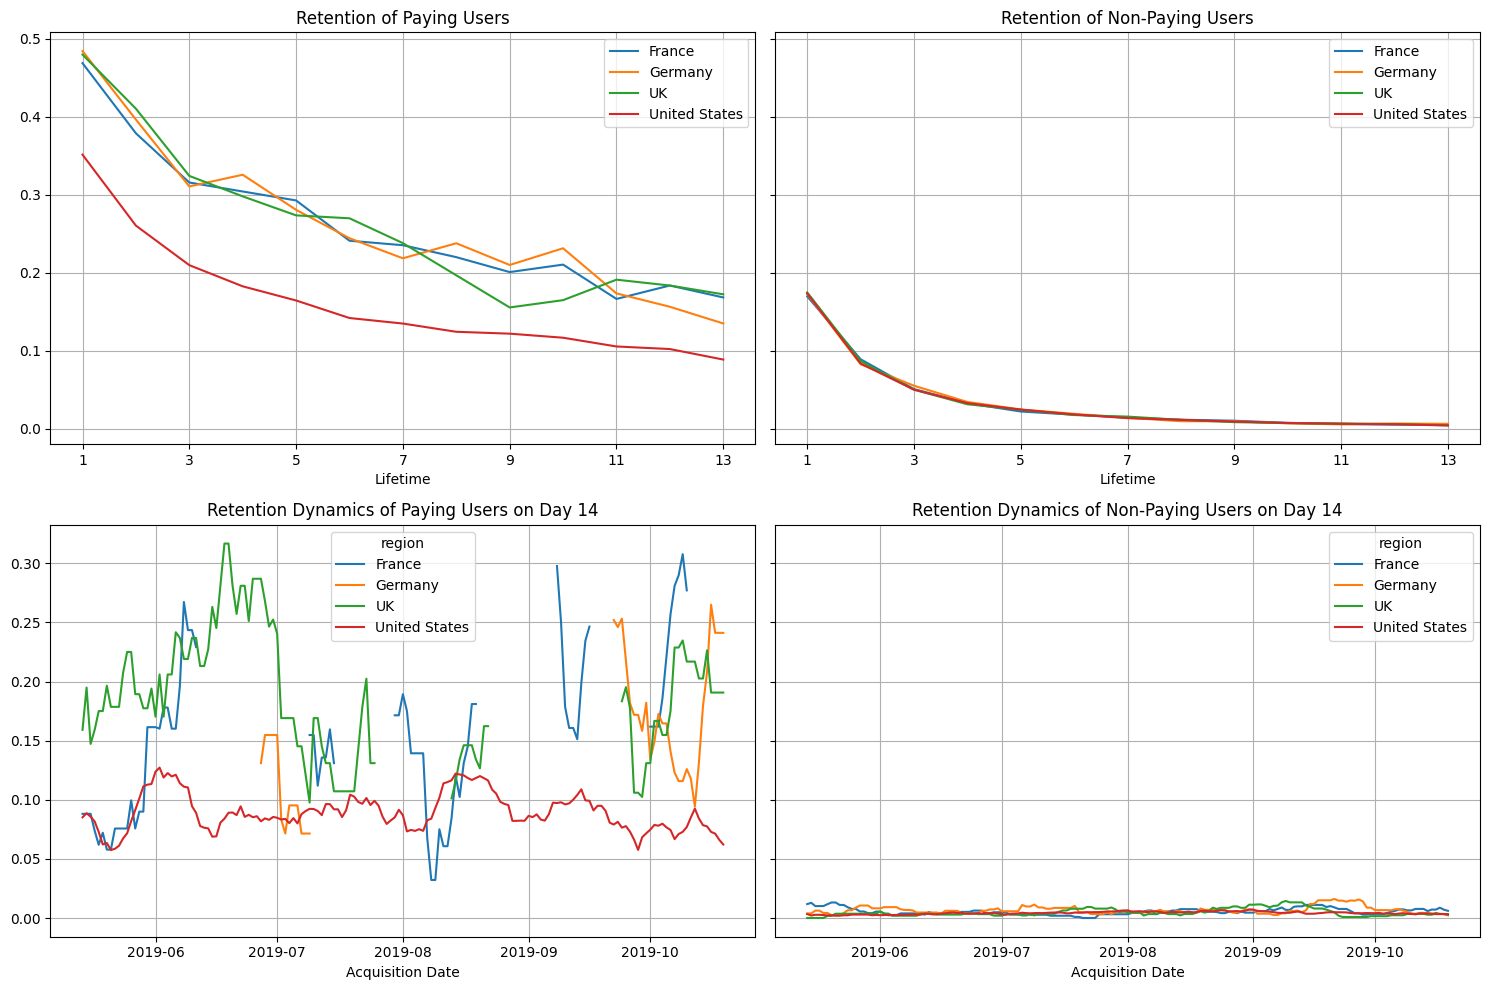

In [42]:
dimensions = ['region']
window = 14

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, filtered_visits, observation_date, horizon_days, dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days, window) 

Based on the graphs, the following conclusions can be made:

- It is evident that the retention of paying users decreases over time for all regions. France, Germany, and the UK show similar trends, with higher retention than in the US. Retention in the US drops significantly faster.
- For non-paying users, there is a sharp decline in retention during the first few days, followed by stabilization at a low level. The differences between countries are minimal – non-paying users are almost not retained in any country.

We will calculate and visualize retention by devices by calling the get_retention() and plot_retention() functions.

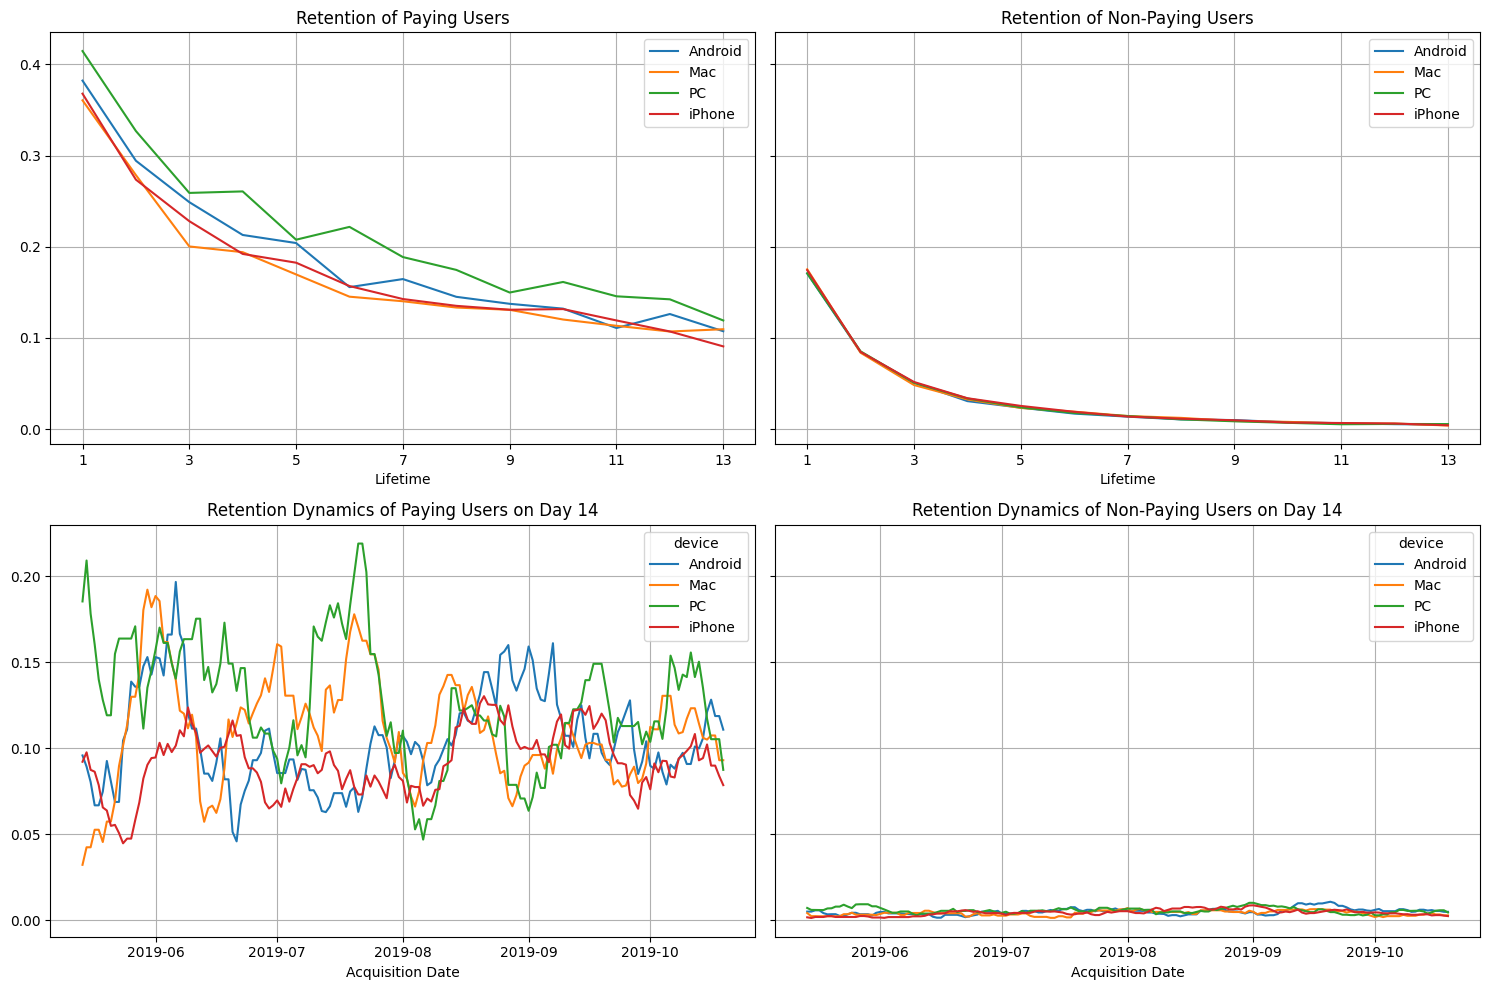

In [43]:
dimensions = ['device']
window = 14

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, filtered_visits, observation_date, horizon_days, dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days, window) 

- It is evident that the retention of paying users decreases over time for all devices. On Android and PC devices, retention is higher compared to Mac and iPhone, where it decreases more quickly.
- For non-paying users, it is clear that all devices show very similar trends: a sharp drop in retention in the first few days, followed by stabilization at a low level.

Let's calculate and visualize retention by channels by calling the functions get_retention() and plot_retention().

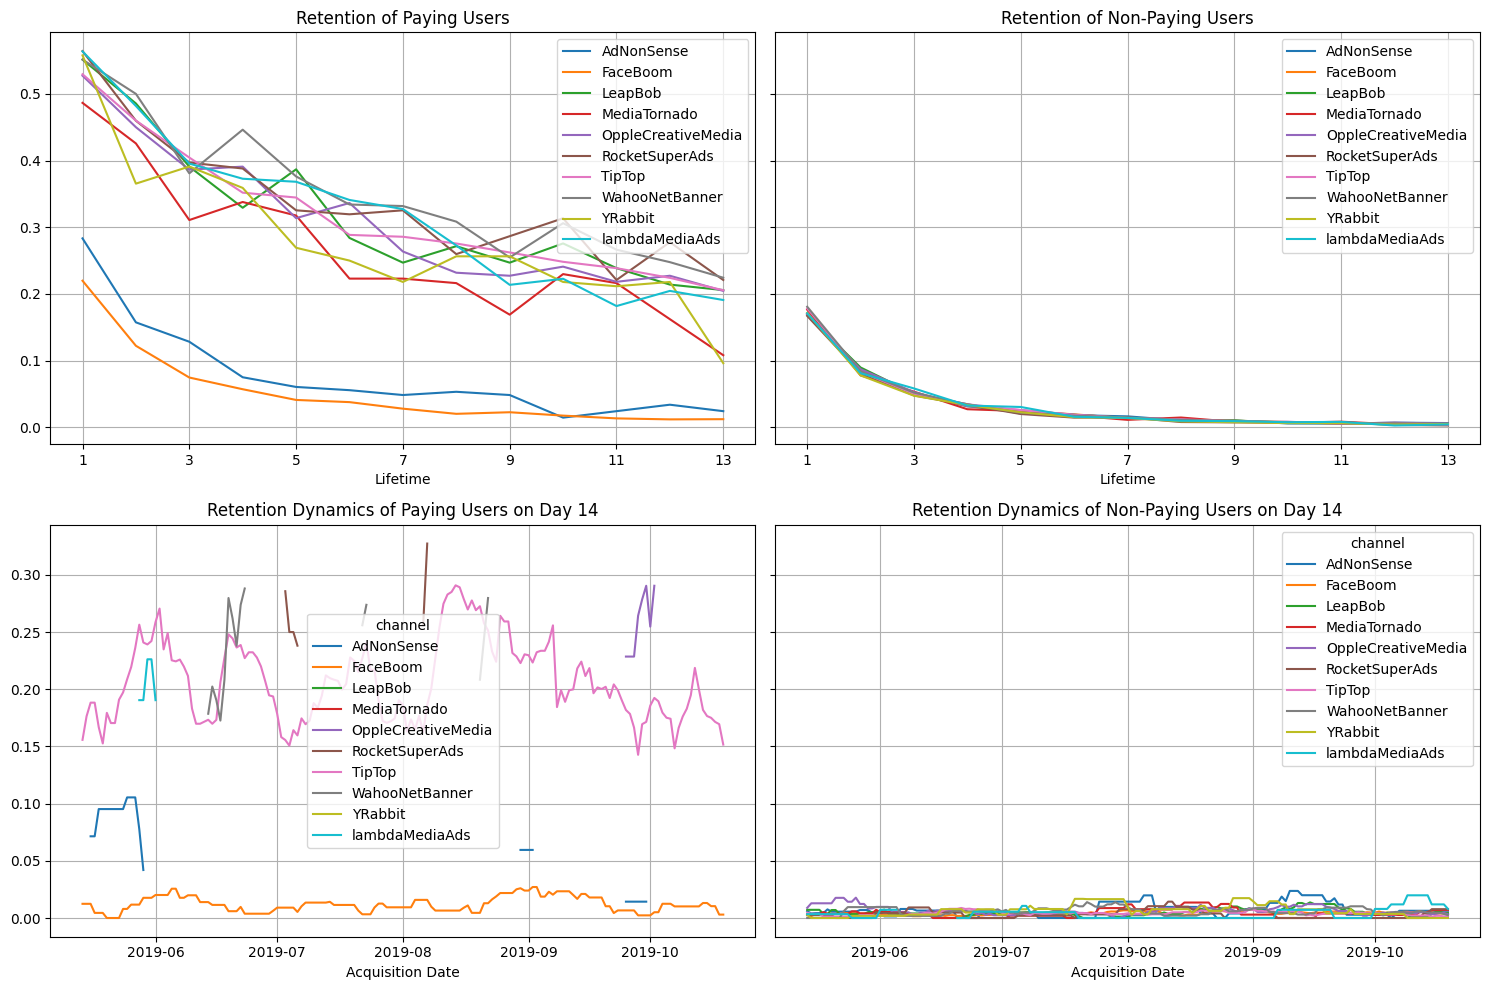

In [44]:
dimensions = ['channel']
window = 14

retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, filtered_visits, observation_date, horizon_days, dimensions=dimensions 
)

plot_retention(retention_grouped, retention_history, horizon_days, window) 

- The channels AdNonSense, FaceBoom, LeapBob, and MediaTornado show lower retention compared to other channels. At the same time, the channels TipTop and OppleCreativeMedia demonstrate higher retention levels.
- As with other factors, all channels exhibit very similar trends: a sharp drop in retention during the first few days, followed by stabilization at a low level.

Let's analyze the advertising profitability by device.

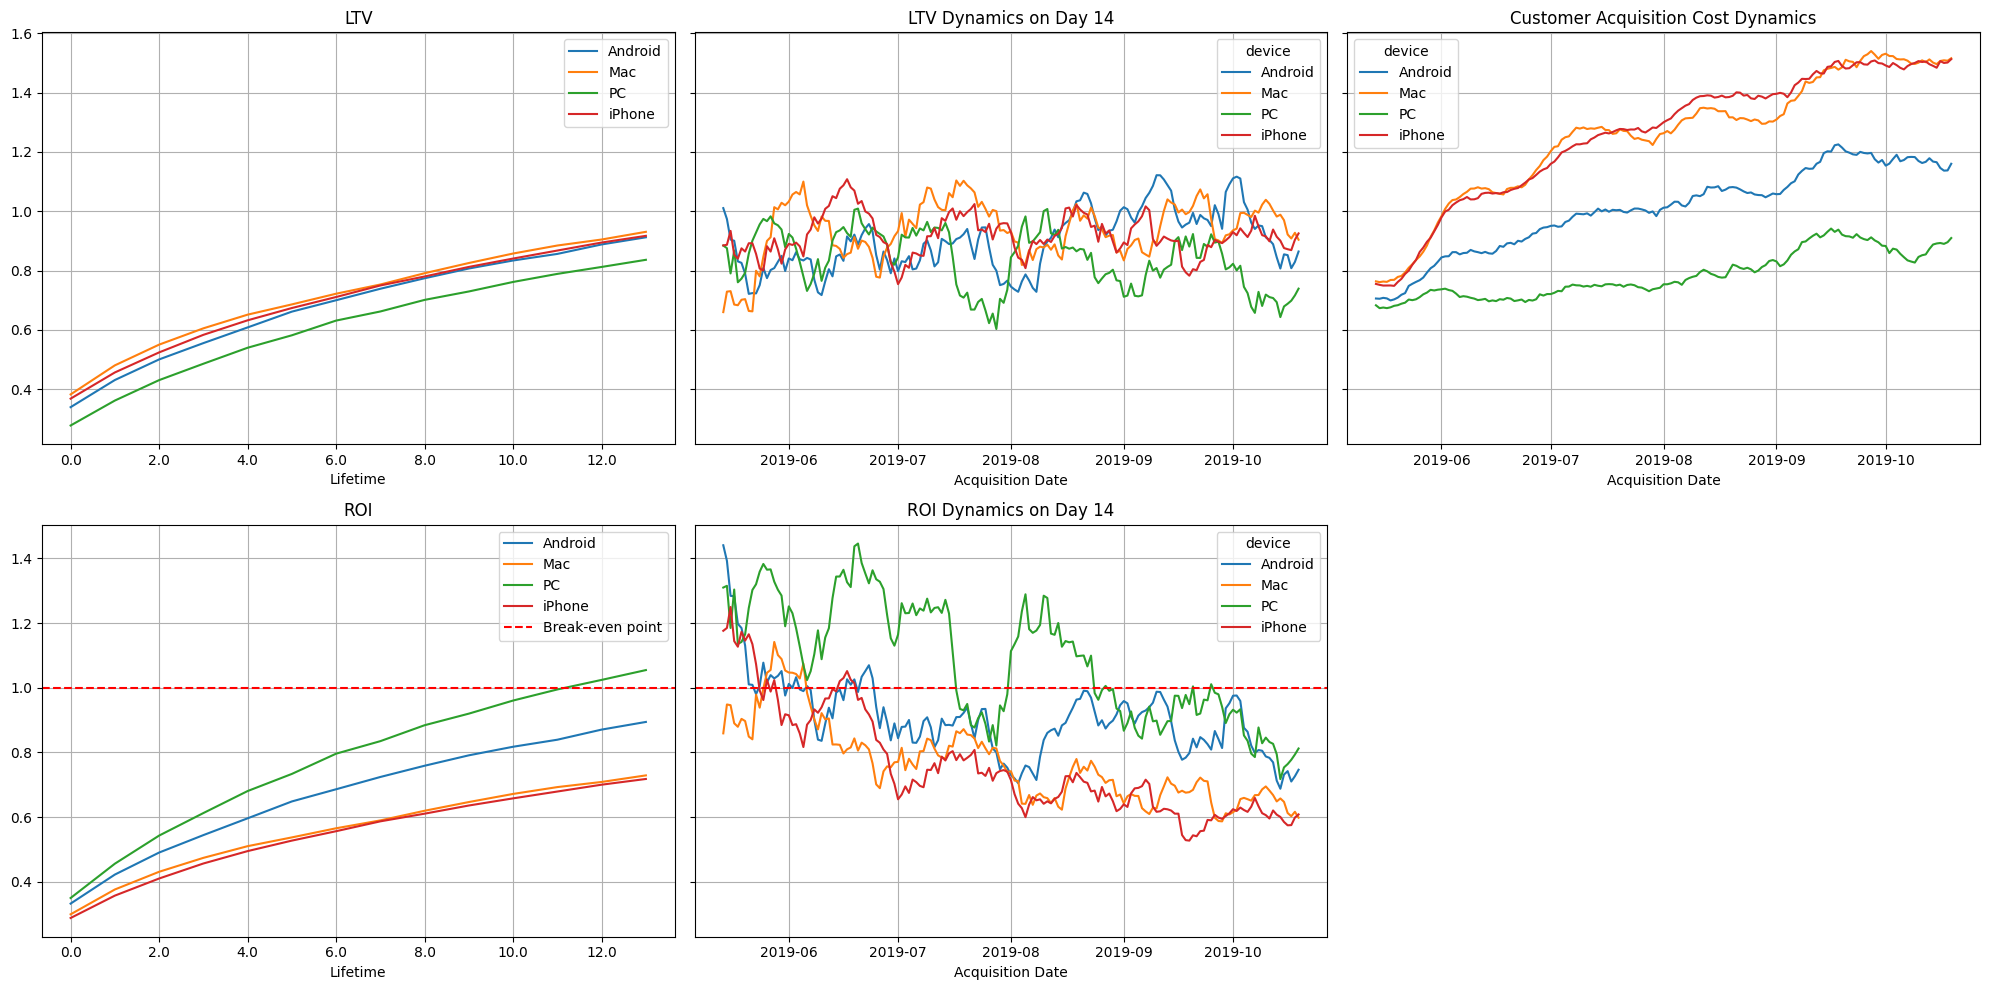

In [45]:
dimensions = ['device']
window = 14

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window
) 

Based on the charts, the following conclusions can be made:

- It is clear that LTV increases over time. LTV for PC users is slightly lower compared to other devices. The rest of the devices are approximately in the same range on the graph. In terms of dynamics, LTV is also unstable for different devices, but the overall trend shows steady growth with some periods of decline.
- CAC is unstable – a constant increase in marketing costs is observed for all types of devices, especially for Mac and iPhone. The lowest CAC is for PC users.
- For Mac, iPhone, and Android users, ROI does not reach one, unlike other platforms. This means that the cost of acquiring users for these devices is not recouped. It might be worth paying close attention to these platforms to find ways to improve their ROI metrics.

The key points to focus on are:

- The cost of acquiring a user significantly increases for all devices, especially for Mac and iPhone, following the trend observed in the overall analysis.
- Profitability (ROI) has not been achieved for Mac, iPhone, and Android.

Let's analyze the return on investment (ROI) of the advertising with a breakdown by country.

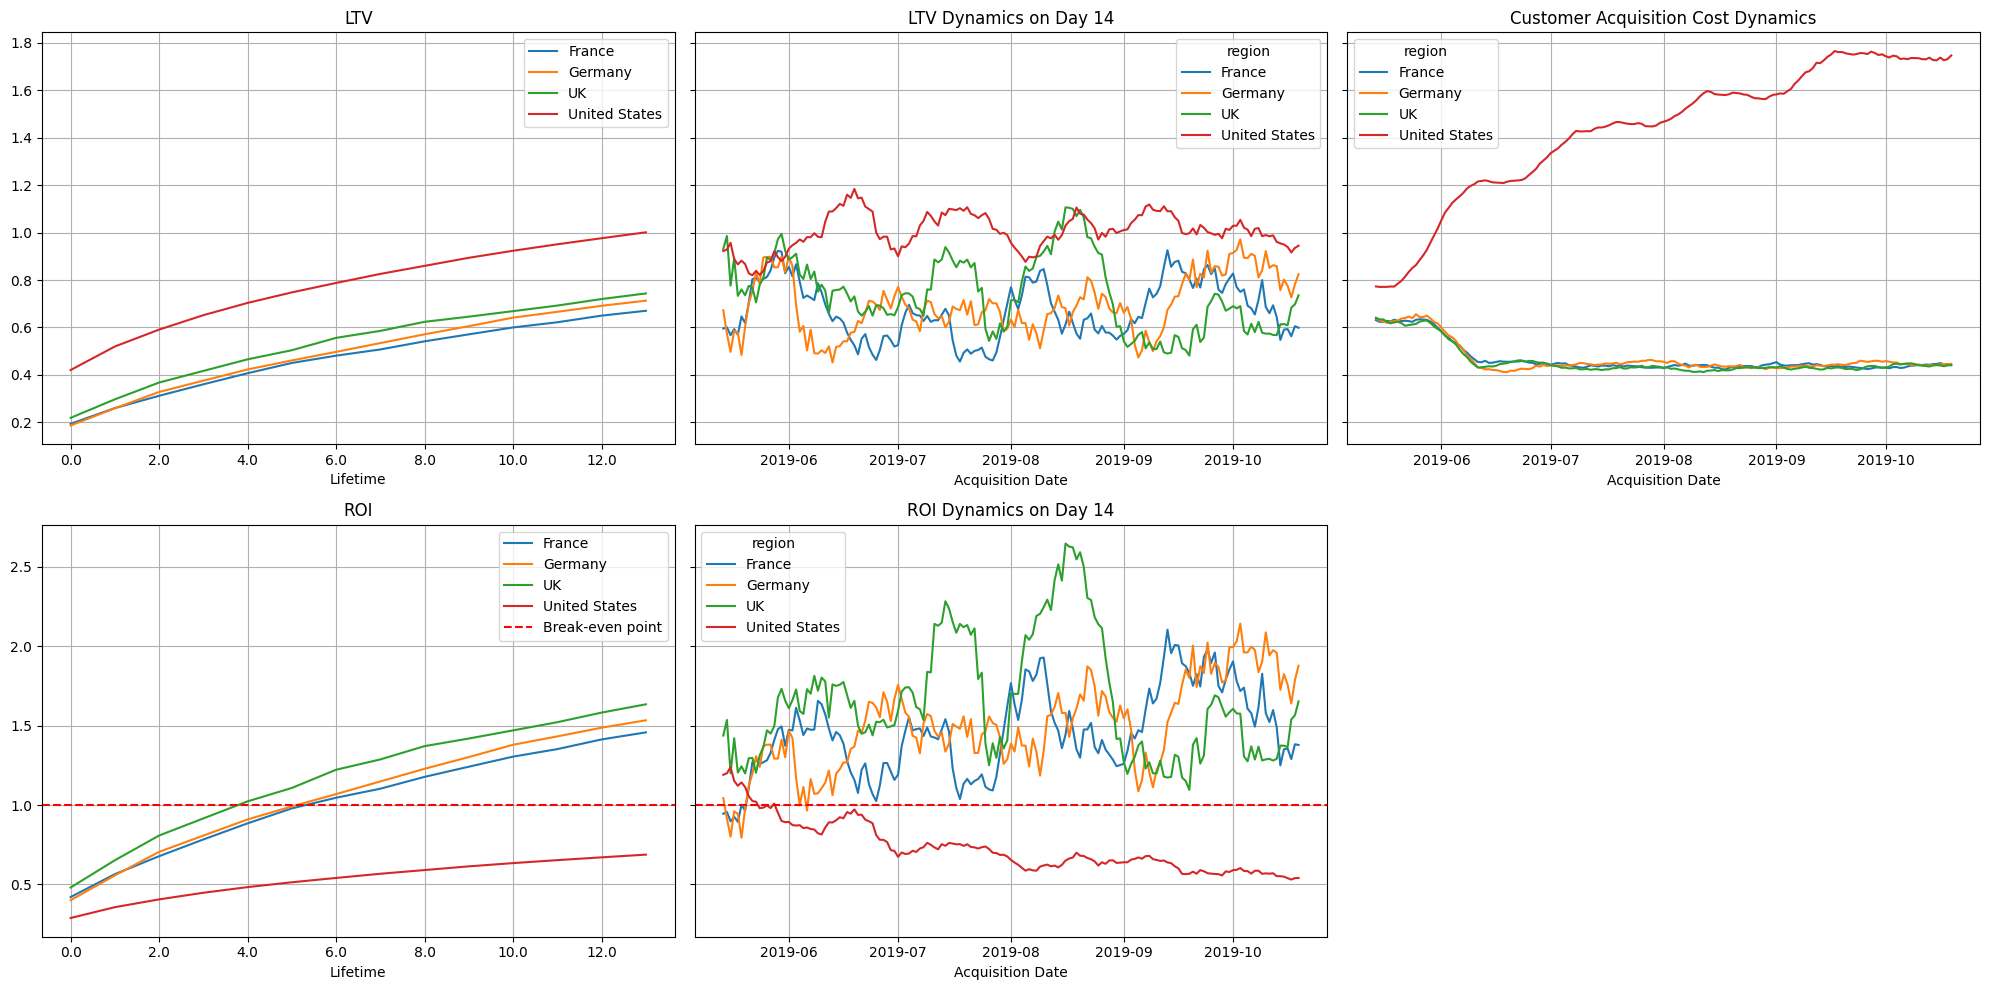

In [46]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

The following conclusions can be drawn from the graphs:

- In the USA, the LTV is significantly higher and grows faster than in other countries. France, Germany, and the UK are not far behind and also show growth, but at a slower pace compared to the USA. Regarding LTV dynamics, all four regions show significant volatility.
- Regarding the cost of acquisition, in the USA, it increases sharply and surpasses the levels of other countries, which initially decrease and then remain stable at a low level.
- The ROI for all countries except the USA stays above the break-even point throughout the period. France, Germany, and the UK show significant fluctuations, but their ROI remains above break-even, indicating stability and effectiveness in their investments, which is not the case for the USA.

The key points to note are:

- These findings show that even with a higher LTV, the USA stands out significantly in many metrics, such as ROI and CAC, unfortunately in a negative way. Meanwhile, France, Germany, and the UK consistently perform above the break-even point, albeit with lower LTV values.
- It is also important to highlight the CAC values— for the USA, it shows a significant increase, following the overall trend. At the same time, CAC for other countries remains relatively stable.

Let's analyze the return on investment of advertising by advertising channels.

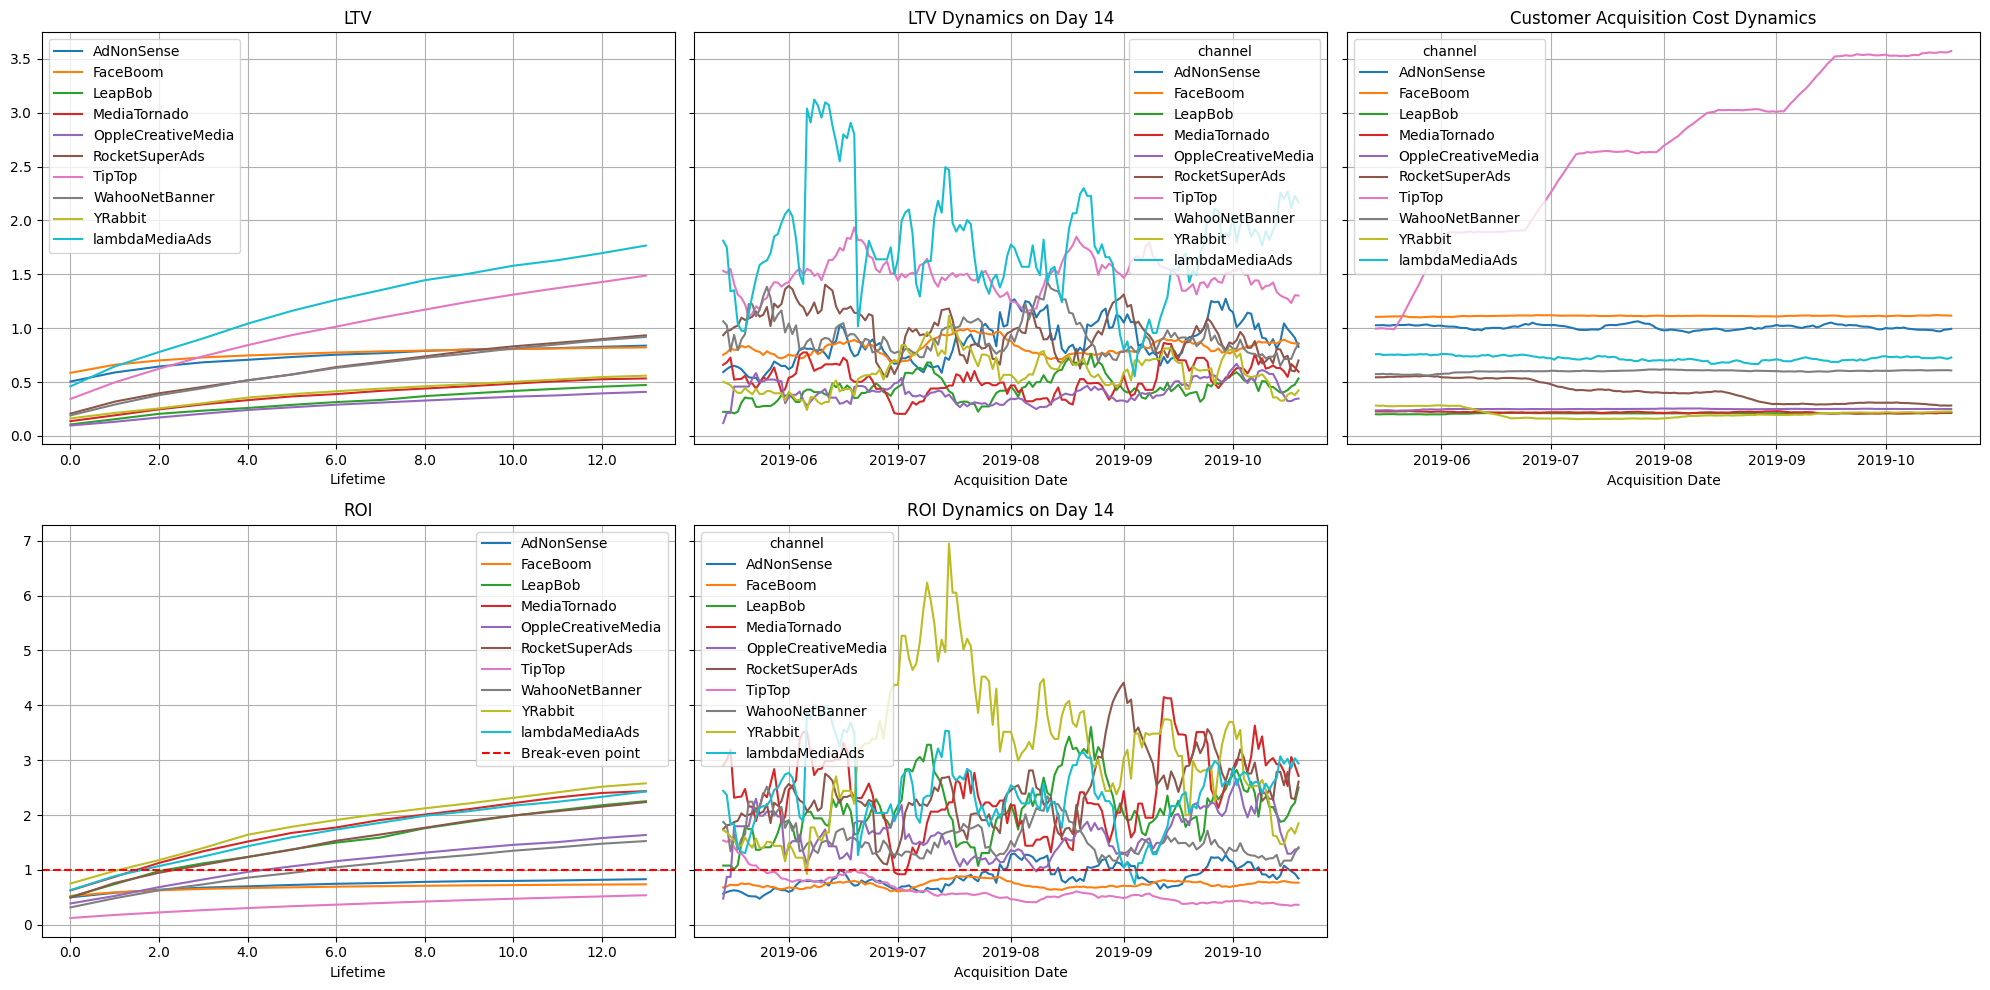

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Based on the charts, the following conclusions can be made:

- Most of the marketing channels do not show strong growth in LTV, but there are favorites such as lambdaMediaAds and TipTop.
- The TipTop channel demonstrates significant growth in customer acquisition cost, while other channels remain relatively stable, such as AdNonSense and FaceBoom, which show a relatively high acquisition cost, or other channels with a lower cost.
- Almost all channels have ROI above the break-even point, indicating a positive return on investment. However, some channels, like TipTop, FaceBoom, and AdNonSense, have not reached this level, possibly due to high acquisition costs.

The customer acquisition cost for some channels has significantly increased, especially for TipTop, AdNonSense, and FaceBoom, which may be related to the rising marketing expenses and undoubtedly affects the break-even point for these channels – it has not been achieved.

### Conclusion

Overall, the advertising campaigns are not paying off. Despite the growth in LTV, which indicates increased revenue from customers as they engage with the app, the break-even point is not achieved. This is especially true for advertising channels like TipTop, FaceBoom, and AdNonSense, which, despite having a high LTV, do not provide a sufficient return on investment. Let's examine the factors that may negatively impact profitability:

- Devices: Advertising targeted at Apple device users (iPhone and Mac) negatively affects profitability. Despite the high LTV and relatively high conversion rates compared to other devices, the cost of acquiring these users rises significantly, reducing ROI.
- Countries: In the US, despite the high and growing LTV, as well as a high conversion rate compared to other devices, the cost of acquiring users increases significantly, reducing overall ROI. In other countries (France, Germany, and the UK), the cost of acquisition remains stable, and ROI stays above the break-even point.
- Channels: Channels like TipTop, FaceBoom, and AdNonSense show significant growth in the cost of acquiring users, negatively affecting their profitability. A large portion of the advertising budget is allocated to these channels, which reduces the overall effectiveness of the campaigns. It's worth noting that AdNonSense and FaceBoom show the highest conversion rates. However, these channels also exhibit lower retention rates compared to others.
Based on the above, it can be assumed that the main issue with profitability stems from the significant increase in the cost of acquiring users (CAC), which has been observed since mid-May, especially in the US, leading to reduced profitability. Additionally, retention rates for both paying and non-paying users are showing a downward trend, particularly in the US for Mac and iPhone devices, where retention drops much faster. Non-paying user retention decreases to zero. Moreover, more than 80% of the advertising budget is concentrated on two channels (TipTop and FaceBoom), which are not achieving the break-even point, despite high LTV values.

Based on this analysis, the following recommendations can be made for the advertising department:

- Review the allocation of the advertising budget, reducing investments in channels like TipTop and FaceBoom and increasing investments in channels with more stable and higher ROI.
- Examine the reasons behind the rising cost of user acquisition in the US and try to optimize it. Increase marketing efforts in countries with more stable break-even metrics (France, Germany, UK).
- Focus on improving user retention for both paying and non-paying users by developing strategies to enhance user experience and increase engagement.

To achieve profitability from advertising campaigns, the focus should be on optimizing user acquisition costs, improving customer retention, and efficiently allocating the advertising budget. Special attention should be given to Apple devices, the FaceBoom and TipTop channels, and user acquisition costs in the US, as these currently have a negative impact on profitability. Regular analysis of the effectiveness of all advertising channels should also be conducted, using ROI and LTV data to make decisions about reallocating the budget.